# **1.Defining the Question**

### **a.)Specifying the Question**

Building a model that determines whether the patient has hypothyroid or not based on their symptoms. 



### **b.)Defining the Metric for Success**

Our project will be considered successful if we are able to effectively build a model that can determine whether or not the patient's symptoms indicate that the patient has hypothyroid.

### **c.)Understanding the Context**.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

Hypothyroidsm is a condition in which the thyroid gland doesn't produce enough thyroid hormone.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
The main job of the thyroid gland is to make the hormone thyroxine, also known as T4 because it has four iodine molecules. The thyroid also makes the hormone triiodothyronine, known as T3 because it has three iodine molecules, but in smaller amounts. The thyroid gland makes mostly T4, and the T4 has to be converted to T3, because T3 is the part of thyroxine that actually does the work.

The pituitary gland at the base of the brain controls hormone production in your body. It makes thyroid-stimulating hormone (TSH), which tells the thyroid gland how much T4 and T3 to produce. The TSH level in your blood reveals how much T4 your pituitary gland is asking your thyroid gland to make.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

Reference:https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284#:~:text=Hypothyroidism%20(underactive%20thyroid)%20is%20a,symptoms%20in%20the%20early%20stages.
https://www.everydayhealth.com/hs/healthy-living-with-hypothyroidism/understanding-test-results/#:~:text=A%20normal%20range%20for%20TSH,t%20get%20into%20your%20cells

Therefore,we are required to Use the healthcare datasets provided to Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

The dataset provided can be found here http://bit.ly/hypothyroid_data

### **d.)Recording the Experimental Design**

The folowing procedure was followed;

1.Defining the Question

2.Reading the Data

3.Reading the Data.

4.Checking the Data.

5.Data Cleaning

6.Performing EDA

6.Building Prediction Models

7.Evaluation of the solution

8.Challenging the solution

9.Conclusion

### **e.)Data Relevance**


This will be discussed after the analysis and prediction has been completed

**Column Features:**



Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4



# **2.Reading the Data**

**Importing the Relevant Libraries**

In [92]:
# Setting the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# setting the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

In [93]:
# Importing all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

**Loading the Dataset**

In [94]:
df=pd.read_csv('/content/hypothyroid.csv')

In [95]:
#previewing the first five entries of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [96]:
#previewing the last 5 entries of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


**Checking the Data**

In [97]:
#determining the number of records of our dataset
df.shape

(3163, 26)

In [98]:
#checking the columns in the dataset
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [99]:
#checking whether each column has an appropriate datatype
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [100]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [101]:
# let us see the unique values in our our columns

for col in list(df):
    print(col)
    print(df[col].unique())

status
['hypothyroid' 'negative']
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
sex
['M' 'F' '?']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
thyroid_surgery
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
pregnant
['f' 't']
sick
['f' 't']
tumor
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
TSH_measured
['y' 'n']
TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '1

In [102]:
#checking the summary statistics of the dataset(this was done after converting the column numericals)
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


# **3.Tyding the Dataset**

In [103]:
#fixing the datatypes in our dataframe
df.age = pd.to_numeric(df.age, errors='coerce')
df.TSH = pd.to_numeric(df.TSH, errors='coerce')
df.T3 = pd.to_numeric(df.T3, errors='coerce')
df.TT4 = pd.to_numeric(df.TT4, errors='coerce')
df.T4U = pd.to_numeric(df.T4U, errors='coerce')
df.FTI = pd.to_numeric(df.FTI, errors='coerce')
df.TBG = pd.to_numeric(df.TBG, errors='coerce')

In [104]:
#checking the column datatypes again
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [105]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [106]:
#checking for duplicates
df.duplicated().sum()

77

In [107]:
#checking for null values
df.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [108]:
#We now replace '?' values in dataset with NaN values 
df.replace(to_replace='?', inplace=True, value=np.NaN)

In [109]:
#we will drop the null values for age column and drop TBG and TBG measured columns
#dropping nulls for age
df.dropna(subset=['age'], inplace=True)

#dropping TBG column
df.drop(['TBG', 'TBG_measured'], axis = 1, inplace = True)


In [110]:
# List of columns containing the remaining null values
df.columns[df.isnull().any()].tolist()

['sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f31c6d950>,
      dtype=object)

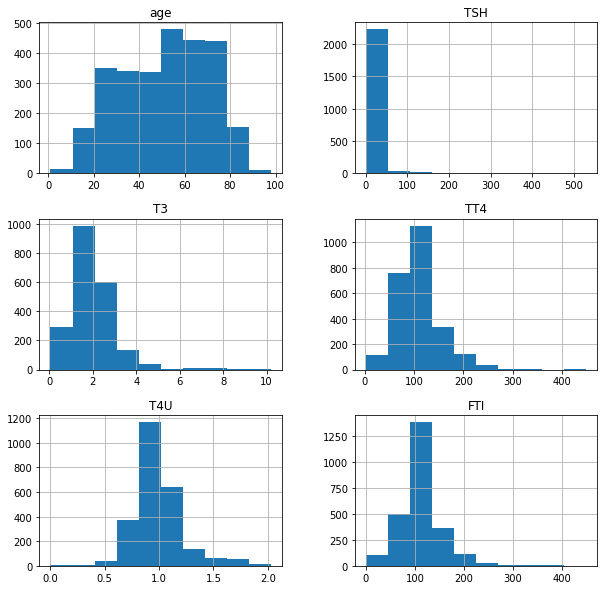

In [111]:
#plotting histograms to find a better way to impute the raimaining nulls

df.hist(figsize = (10,10))

In [112]:

#The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution,
#we willl use mean and median to impute the nulls

df['TSH'].fillna(df['TSH'].mean(), inplace = True)
df['T3'].fillna(df['T3'].median(), inplace = True)
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['FTI'].fillna(df['FTI'].median(), inplace = True)
df['T4U'].fillna(df['T4U'].median(), inplace= True)
df['sex'].fillna('F', inplace = True)
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

# **4.Exploratory Data Analysis**

**Univariate Analysis**

In [113]:
# Ploting the univariate summaries and recording our observations

df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000,2717.000000
mean,51.154214,6.018612,1.913397,108.787597,0.987372,111.635554
std,19.294405,22.123952,0.880823,43.824767,0.213500,41.559865
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.500000,85.000000,0.870000,92.000000
50%,54.000000,1.000000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,6.018612,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.030000,450.000000


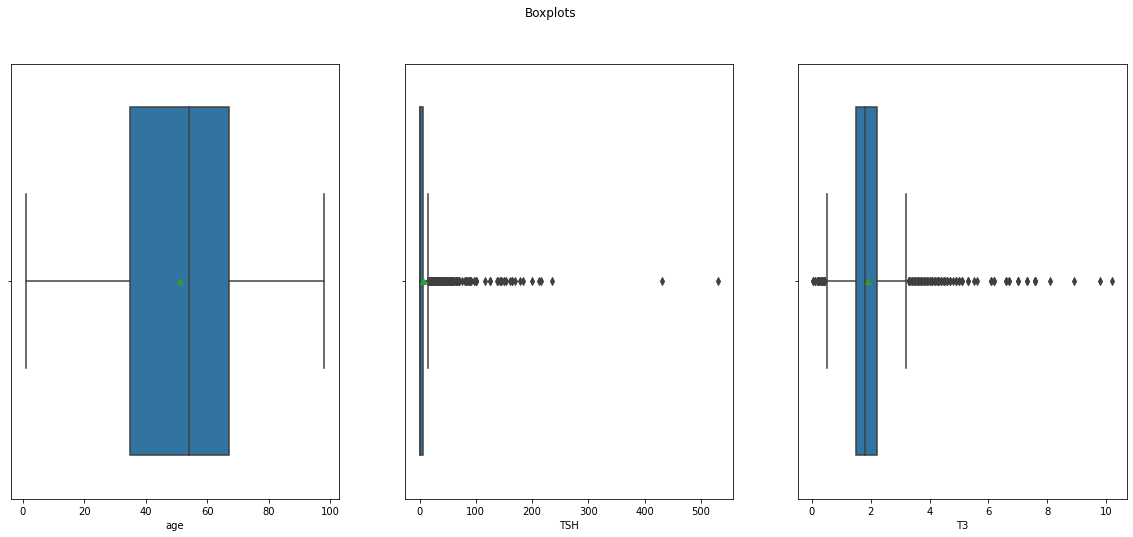

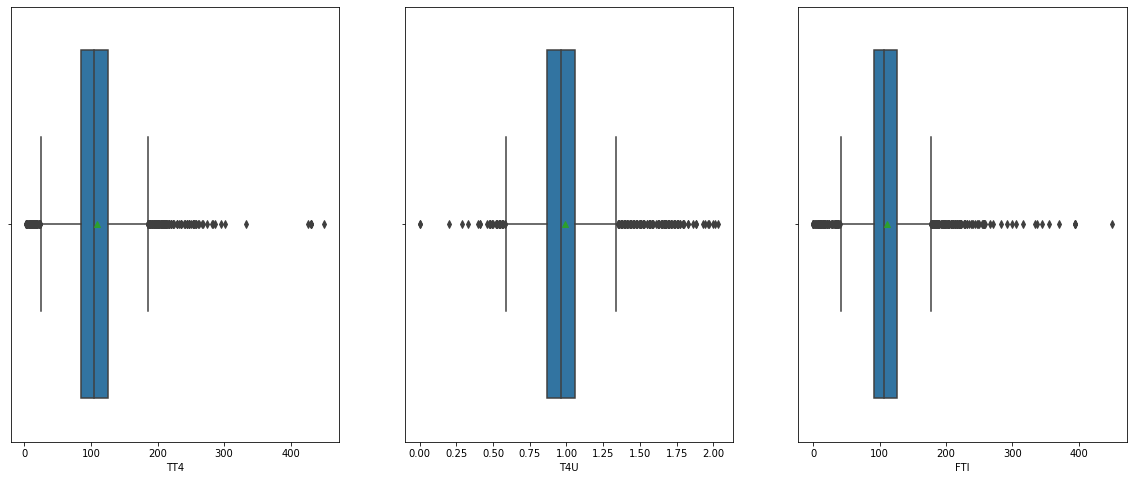

In [114]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = df['age'], ax=ax1, showmeans = True)
sns.boxplot(x = df['TSH'], ax=ax2, showmeans = True)
sns.boxplot(x = df['T3'], ax=ax3, showmeans = True)

fig, (ax4,ax5,ax6) = plt.subplots(1,3, figsize=(20, 8))
sns.boxplot(x = df['TT4'], ax=ax4, showmeans = True)
sns.boxplot(x = df['T4U'], ax=ax5, showmeans = True)
sns.boxplot(x = df['FTI'], ax=ax6, showmeans = True)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f3feaf110>,
      dtype=object)

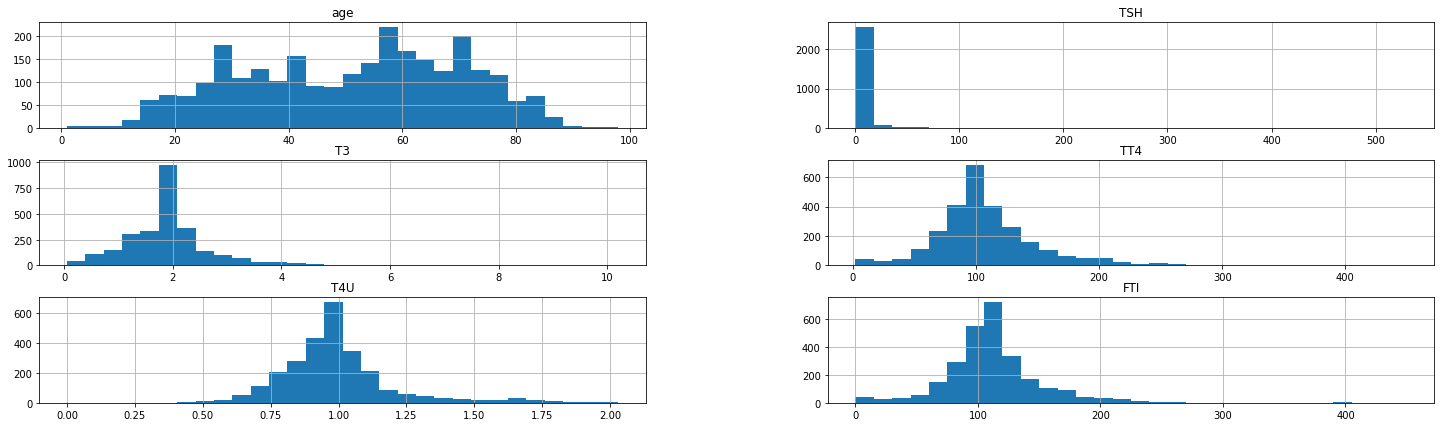

In [115]:
#checking the distributions of our data
df.hist(bins=30, figsize=(25, 7))

From the histograms,age and T4U are normally distributed

While t3,tsh,tt4,fti are skewed to the right meaning their mean is greater than their modes

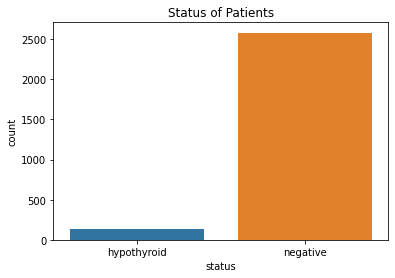

In [116]:
#bar graph showing the status count of patients
sns.countplot(x='status',data=df)
plt.title('Status of Patients')
plt.show()

From the summary above we can conclude that most patients do not have hypothyroid

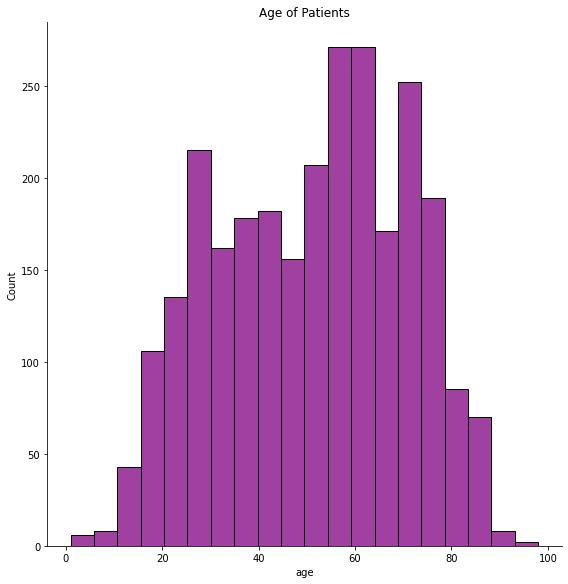

In [117]:
#Histogram of Age
sns.displot(df['age'], bins=20, height=8,color='purple')
plt.title('Age of Patients')
plt.show()

Majority of the patients are between 40-70yrs

Text(0.5, 1.0, 'Gender Count')

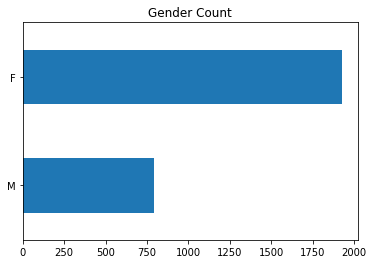

In [118]:
# Bar graph showing count of males and females in our dataframe 
df.sex.value_counts().sort_values().plot.barh()
plt.title('Gender Count')


Majority of the patients are female since hypothyroid affects women mostly(from our research)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

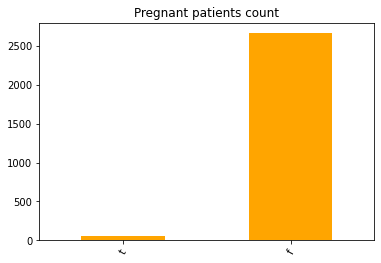

In [119]:
# Bar graph showing count of pregnant women in our dataframe 
df.pregnant.value_counts().sort_values().plot.bar(color='orange')
plt.title('Pregnant patients count')
degrees = 60
plt.xticks(rotation=degrees)


Majority of the patients were not pregnant

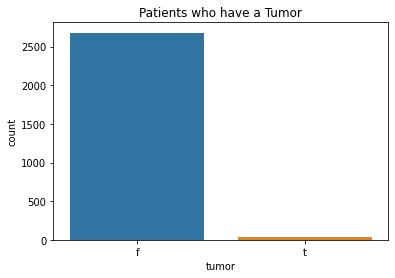

In [120]:
#bar grah showing counts of patients with tumors
sns.countplot(x='tumor',data=df)
plt.title('Patients who have a Tumor')
plt.show()

Majority of the patients do not have tumors

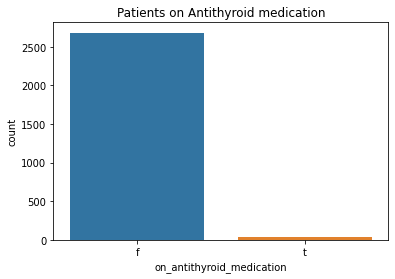

In [121]:
# Bar graph showing counts of patients on anti-thyroid medications
sns.countplot(x='on_antithyroid_medication',data=df)
plt.title('Patients on Antithyroid medication')
plt.show()


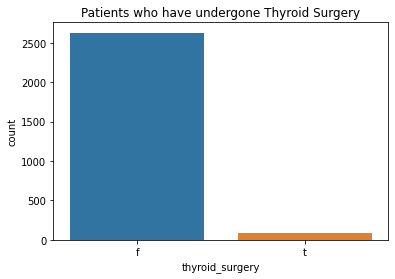

In [122]:
#bar graph showngof counts of  patients who have undergone thyroid surgery
sns.countplot(x='thyroid_surgery',data=df)
plt.title('Patients who have undergone Thyroid Surgery')
plt.show()

Few patients had undergone thyroid surgery

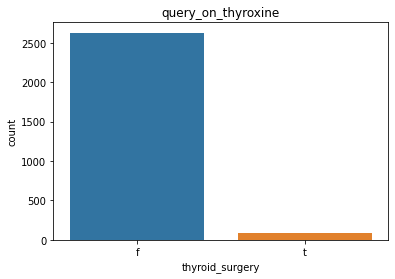

In [123]:
#bar graph of patents who have had query on thyroxine
sns.countplot(x='thyroid_surgery',data=df)
plt.title('query_on_thyroxine')
plt.show()

**Bivariate Analysis**

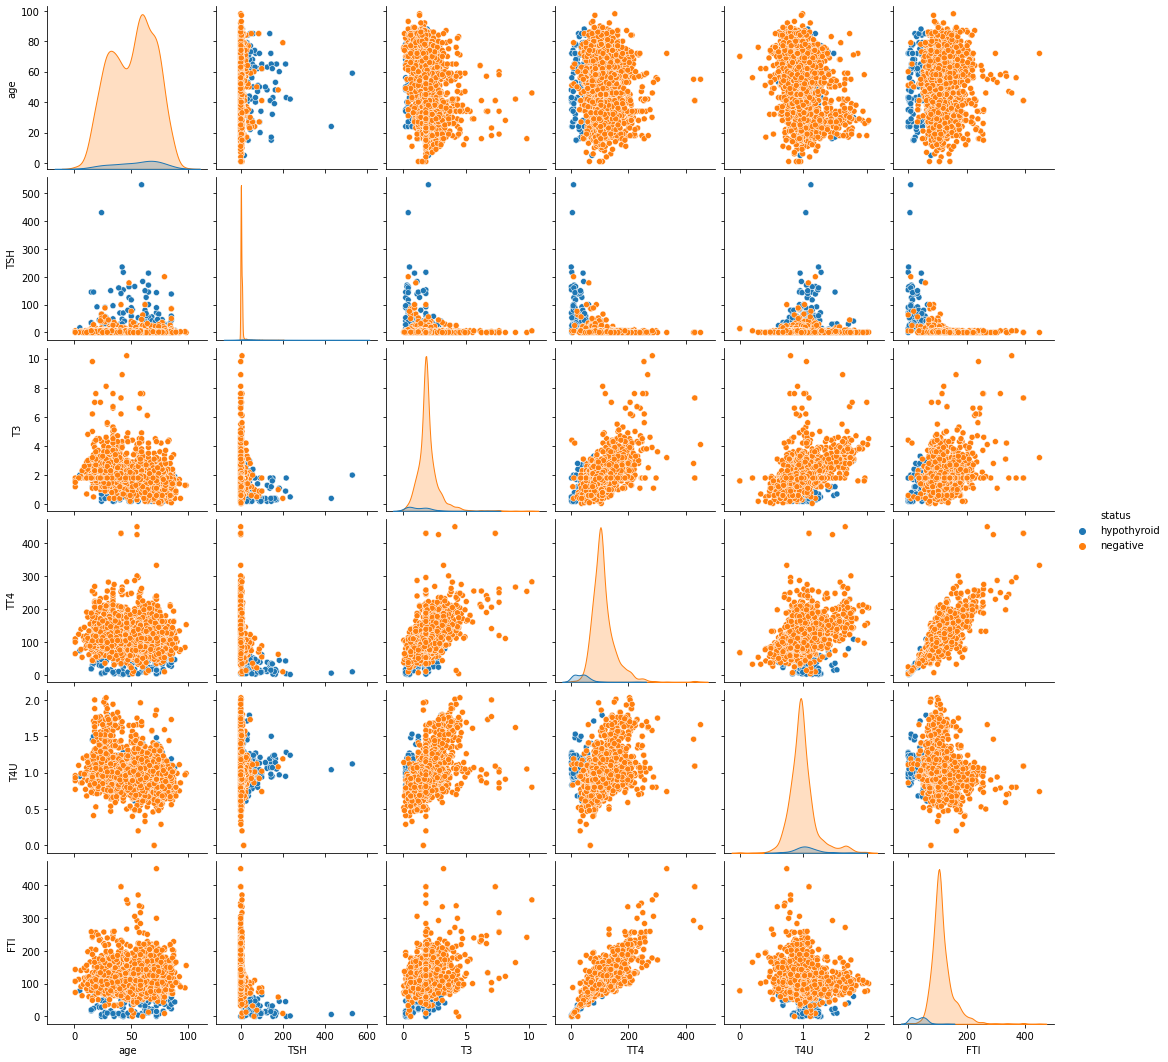

In [124]:

# Ploting the bivariate summaries and recording our observations
sns.pairplot(df, hue="status")
plt.show()

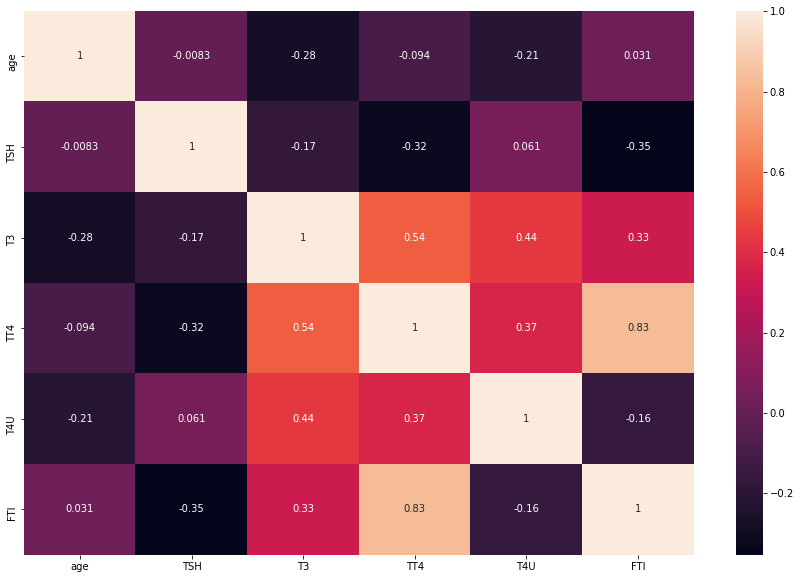

In [125]:
#calculating the pearson coefficient correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

TT4 and FTI has a strong positive correlation followed by T3 na TT4.
while FTI and TSH has an average negative correlation

**Checking Multicollinearity**

In [126]:
#multicollinearity test

#we will focus on our independent variables only.
df2 = df[['age', 'TSH', 'T3', 'TT4', 'T4U','FTI']]

#displaying the correlations between the variables
correlations = df2.corr()

correlations

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.008326,-0.277204,-0.093937,-0.210910,0.030510
TSH,-0.008326,1.000000,-0.172515,-0.317214,0.060654,-0.352590
T3,-0.277204,-0.172515,1.000000,0.540861,0.437954,0.326563
TT4,-0.093937,-0.317214,0.540861,1.000000,0.372246,0.827526
T4U,-0.210910,0.060654,0.437954,0.372246,1.000000,-0.158154
FTI,0.030510,-0.352590,0.326563,0.827526,-0.158154,1.000000


In [127]:
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,TSH,T3,TT4,T4U,FTI
age,1.108684,0.022239,0.311941,0.166418,-0.008288,-0.266879
TSH,0.022239,1.166533,0.098546,0.560160,-0.339696,-0.138823
T3,0.311941,0.098546,1.653469,-0.413109,-0.551690,-0.260127
TT4,0.166418,0.560160,-0.413109,18.447407,-9.279589,-16.405969
T4U,-0.008288,-0.339696,-0.551690,-9.279589,6.091183,8.703082
FTI,-0.266879,-0.138823,-0.260127,-16.405969,8.703082,15.996928


The features ahve an average correlation except FTI and TT4 which have high multicollinearity.

In [128]:
# label encoding of categorical data
#
df = df.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})
# let us preview our dataset to ensure the changes have taken effect
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


# **Implementing The Solution**

# **Prediction Models**

In [129]:
#checking the data types after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2717 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     2717 non-null   int64  
 1   age                        2717 non-null   float64
 2   sex                        2717 non-null   int64  
 3   on_thyroxine               2717 non-null   int64  
 4   query_on_thyroxine         2717 non-null   int64  
 5   on_antithyroid_medication  2717 non-null   int64  
 6   thyroid_surgery            2717 non-null   int64  
 7   query_hypothyroid          2717 non-null   int64  
 8   query_hyperthyroid         2717 non-null   int64  
 9   pregnant                   2717 non-null   int64  
 10  sick                       2717 non-null   int64  
 11  tumor                      2717 non-null   int64  
 12  lithium                    2717 non-null   int64  
 13  goitre                     2717 non-null   int64

# **Decision Trees**

**Gradient Boost**

In [135]:
# Split the independent and dependent variables
# let us use all the features
X = df.drop('status', axis =1)
y = df.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=100, learning_rate=0.01, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy score: {accuracy_score(y_test, y_pred_gbc)}')
print(f'F1 score: {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'Accuracy Score: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'F1 Score: {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

Accuracy score: 0.9889705882352942
F1 score: 0.8767123287671232
[[775   4]
 [  5  32]]


Accuracy Score: 0.997369805365597
F1 Score: 0.9743589743589745
[[1801    1]
 [   4   95]]


In [ ]:
# Getting the feature importance
# Creating a dataframe of features and their respective importances
# plotting a bar graph to visualize the important features for our gradient boost model
pd.DataFrame({'Features' : X.columns, 'Importance' : gbc.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Gradient Boost',figsize = (10, 8), color = 'blue')
plt.show()

From the bar graph our most important features are:
FTI,TSH,on-antithyroid medication,T3,age,on-thyroxine,TT4,thyroid_surgery and query_hypothyroid

In [139]:

# let us see the 10 most important features of or dataframe
pd.DataFrame({'Features' : X.columns, 'Importance' : gbc.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features').head(10)

,Importance
Features,
FTI,0.647489
TSH,0.279854
on_antithyroid_medication,0.021194
T3,0.015409
age,0.008677
on_thyroxine,0.007749
TT4,0.007432
thyroid_surgery,0.005240
T4U,0.002666


In [143]:
#remodelling using the 10 important features
# let us do some remodelling with the top 10 important features to see if our f1 score will improve
# Split the independent and dependent variables
# let us use 10 of the features
X = df[['FTI','TSH','on_antithyroid_medication','T3','age','on_thyroxine','TT4','thyroid_surgery',
              'T4U','query_hypothyroid']]
y = df.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=300, learning_rate=0.1, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy score: {accuracy_score(y_test, y_pred_gbc)}')
print(f'F1 score: {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'Accuracy score: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'F1 score: {f1_score(y_train, y_pred_gbc_train)}')



Accuracy score: 0.9889705882352942
F1 score: 0.88
[[774   5]
 [  4  33]]


Accuracy score: 1.0
F1 score: 1.0


**Hyperparameter Tuning**

In [148]:

# Look at parameters used by our current forest
grad = GradientBoostingClassifier(random_state = 40)
# Look at parameters used by our current forest
print('Parameters in use:\n')
print(grad.get_params())

Parameters in use:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 40, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [150]:
#adjusting the set of hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'learning_rate': learning_rate}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbc = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model-
gbc_random.fit(X, y)
# Checking for the best parameters
#
print(f'Best Parameters: {gbc_random.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 297 out of 300 | elapsed:  2.7min remaining:    1.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


Best Parameters: {'n_estimators': 888, 'min_samples_split': 10, 'max_depth': 15, 'learning_rate': 0.25}


In [153]:
# Applying the best parameters to the model
# Selecting only important features and the y variable
X = df[['FTI','TSH','on_antithyroid_medication','T3','age','on_thyroxine','TT4','thyroid_surgery',
              'T4U','query_hypothyroid']]
y = df.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=888, 
                                 learning_rate=0.25, max_depth=15, min_samples_split=10)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_gbc)}')
print(f'F1 Score {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'Accuracy score: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'F1 Score {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

Accuracy Score: 0.9865196078431373
Accuracy Score 0.8493150684931507
[[774   5]
 [  6  31]]


Accuracy score: 1.0
F1 Score 1.0
[[1802    0]
 [   0   99]]


The Accuracy Scores for all the models in our gradient boost classifier were as follows:


Accuracy Score for normal random forest classifier:

Accuracy score test set:O.98

Accuracy score train set:0.99


Accuracy Score for 10 most important features:

Accuracy score test set:O.98

Accuracy score train set:1.0

Accuracy Score for the most important features:

Accuracy score test set:O.98

Accuracy score train set:1.0

**Random Forest**

In [157]:
# Separating the target from our data
ft = (df.drop(['status'],axis=1)).columns
X = df.drop(['status'],axis=1)
y = df['status']

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [161]:
#instantiate the model 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score

forest = RandomForestClassifier(random_state=0)

# Train it on our training set.
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ftrain = forest.predict(X_train)
y_pred = forest.predict(X_test)


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ftrain))
print('R-squared train:',r2_score(y_train, y_pred_ftrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ftrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  1.0
R-squared train: 1.0
Mean Squared Error train: 0.0


********************


Accuracy Score test:  0.9908088235294118
R-squared test: 0.8051436349308689
Mean Squared Error test: 0.009191176470588236


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       517
           1       0.92      0.89      0.91        27

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



In [162]:
#Manually optimizing the model
#The class are imbalanced though so let as introduce class weighting on top of the already default bootstrapping
 #instantiate the model 

forest = RandomForestClassifier(n_estimators=5, max_depth=6,class_weight='balanced_subsample', random_state=0)

# Train it on our training set.
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_ftrain = forest.predict(X_train)
y_pred = forest.predict(X_test)


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ftrain))
print('R-squared train:',r2_score(y_train, y_pred_ftrain))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ftrain))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  0.9958582604693972
R-squared train: 0.9130707275442714
Mean Squared Error train: 0.0041417395306028535


********************


Accuracy Score test:  0.9871323529411765
R-squared test: 0.7272010889032166
Mean Squared Error test: 0.012867647058823529


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       517
           1       0.92      0.81      0.86        27

    accuracy                           0.99       544
   macro avg       0.95      0.91      0.93       544
weighted avg       0.99      0.99      0.99       544



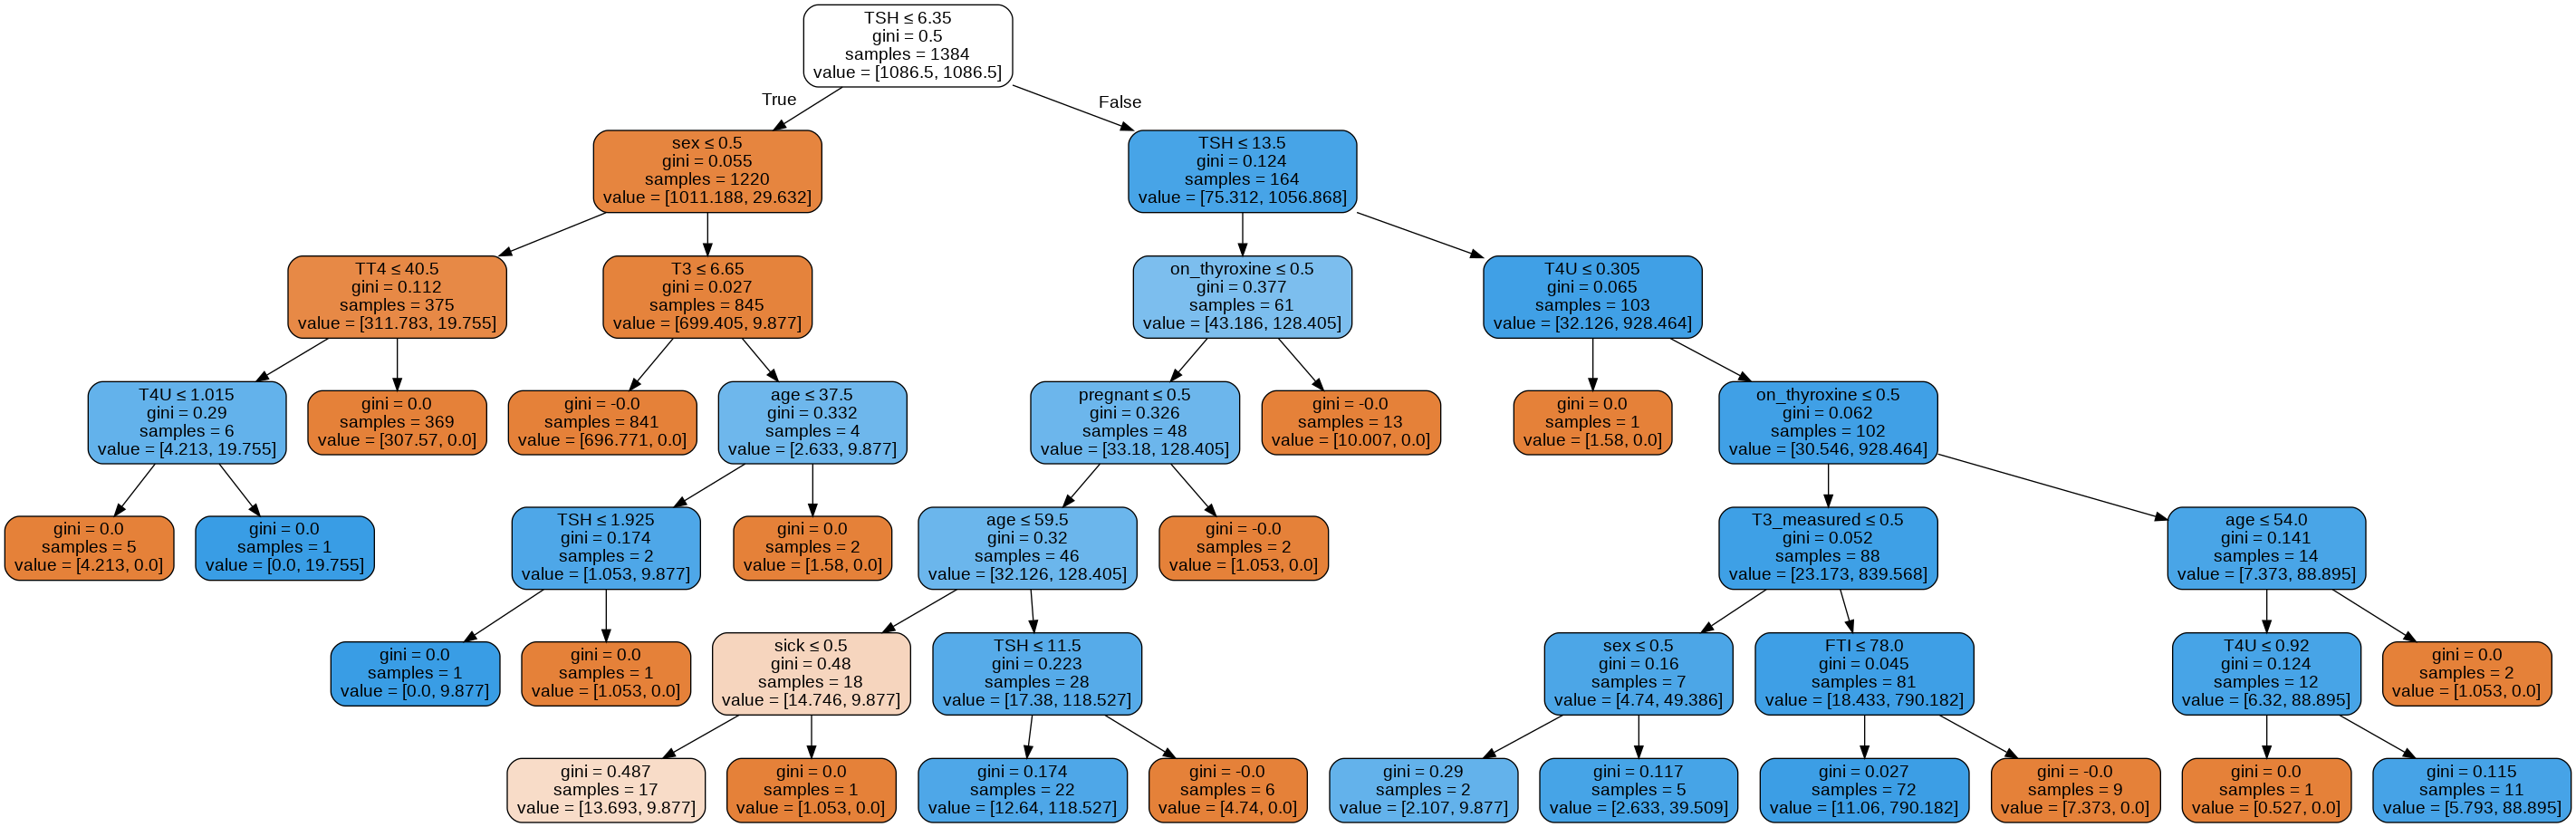

In [173]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest to visualize
tree = forest.estimators_[3]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

In [171]:
# let us see the 10 most important features of or dataframe
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features').head(10)

,Importance
Features,
TSH,0.479603
TT4,0.298337
FTI,0.079140
T4U,0.052440
T3,0.050861
TSH_measured,0.014296
age,0.008100
sex,0.004542
thyroid_surgery,0.004036


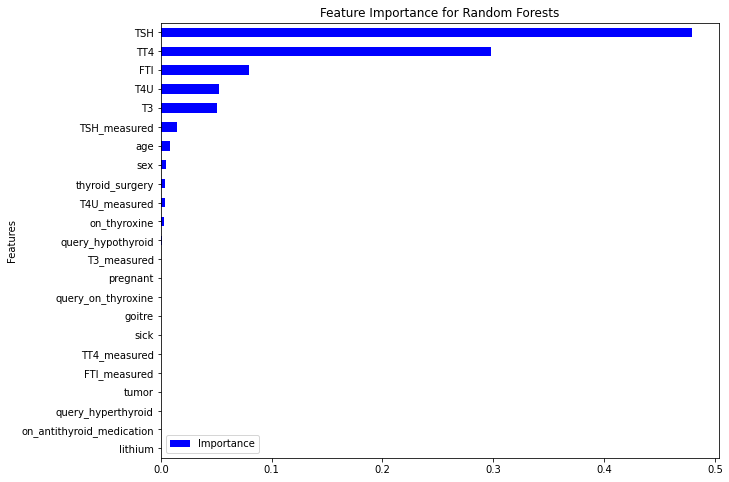

In [178]:
#visualizing the features above
# Getting the feature importance
# plotting a bar graph to visualize the important features of our random forest
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'blue')
plt.show()

In [225]:

# let us do some remodelling with the top 10 important features to see if our f1 score will improve
X = df[['FTI', 'TSH', 'TT4', 'T3','T4U', 
             'age', 'TSH_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid']]
y = df.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
forest = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                min_samples_split = 10, max_depth=5)
forest.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = forest.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))

The accuracy score for our test dataset is: 0.9877450980392157
The f1 score for our test dataset is 0.8809523809523809
[[769   6]
 [  4  37]]


The accuracy score for our train dataset is: 0.9936875328774329
The f1 score for our train dataset is 0.9361702127659575
[[1801    5]
 [   7   88]]


**Hyperparameter Tuning**

The most important features were found to be TSH,TT4 and FTI


Comparing the metrics of Random Forest and Gradient Boosting, The Gradient Boosting Model performs the best.

**ADA Boost**

In [179]:

#Creating AdaBoost Classifier
ada_boost = AdaBoostClassifier(random_state=0)


ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada_train = ada_boost.predict(X_train)
y_pred_ada = ada_boost.predict(X_test)

In [180]:
# Model Accuracy
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score, classification_report, f1_score,r2_score


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_ada_train))
print('R-squared train:',r2_score(y_train, y_pred_ada_train))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_ada_train))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred_ada))
print('R-squared test:',r2_score(y_test, y_pred_ada))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred_ada))
print('\n')
print(classification_report(y_test,y_pred_ada))

Accuracy Score train:  0.9958582604693972
R-squared train: 0.9130707275442714
Mean Squared Error train: 0.0041417395306028535


********************


Accuracy Score test:  0.9908088235294118
R-squared test: 0.8051436349308689
Mean Squared Error test: 0.009191176470588236


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       517
           1       0.92      0.89      0.91        27

    accuracy                           0.99       544
   macro avg       0.96      0.94      0.95       544
weighted avg       0.99      0.99      0.99       544



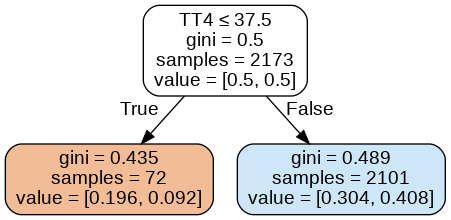

In [182]:
#Visualize a random tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the adaboost tree estimators
tree = ada_boost.estimators_[25]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [184]:
# let us see the 10 most important features of our dataframe
pd.DataFrame({'Features' : X.columns, 'Importance' : ada_boost.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features').head(10)

,Importance
Features,
TSH,0.26
FTI,0.18
TT4,0.18
T4U,0.12
T3,0.10
age,0.04
on_thyroxine,0.04
query_hypothyroid,0.02
goitre,0.02


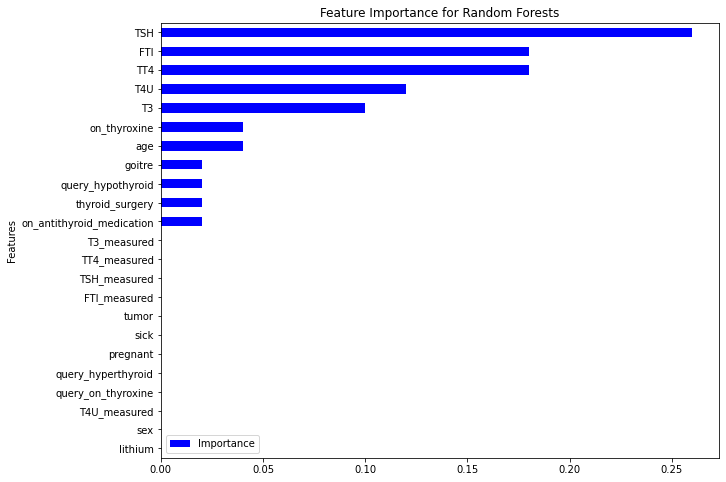

In [185]:
#visualizing the features above
# Getting the feature importance
# plotting a bar graph to visualize the important features of our ada boost
pd.DataFrame({'Features' : X.columns, 'Importance' : ada_boost.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'blue')
plt.show()

**Decision Trees Conclusion**

Different models gave different ranges of importance to the features.
 
We can conclude that the best model amongst the 3 we experimented was Gradient boost because of its improved R2

# **SVM**

**Polynomial SVM**

In [186]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly' , random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [187]:
#Predict
y_pred_psvm = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[516   1]
 [ 14  13]]


In [191]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_psvm))
print('R-squared train:',r2_score(y_train, y_pred_psvm))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_psvm))
print('\n')
print('*'*50)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  0.9746893695352048
R-squared train: 0.4687655572149919
Mean Squared Error train: 0.025310630464795213


**************************************************


Accuracy Score test:  0.9724264705882353
R-squared test: 0.415430904792607
Mean Squared Error test: 0.027573529411764705


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       517
           1       0.93      0.48      0.63        27

    accuracy                           0.97       544
   macro avg       0.95      0.74      0.81       544
weighted avg       0.97      0.97      0.97       544



**RBF SVM**

In [192]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf' , random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [193]:
#Predict
y_pred_rbf = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [194]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[516   1]
 [  9  18]]


In [195]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_rbf))
print('R-squared train:',r2_score(y_train, y_pred_rbf))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_rbf))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  0.9811320754716981
R-squared train: 0.6039888699239031
Mean Squared Error train: 0.018867924528301886


********************


Accuracy Score test:  0.9816176470588235
R-squared test: 0.610287269861738
Mean Squared Error test: 0.01838235294117647


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       517
           1       0.95      0.67      0.78        27

    accuracy                           0.98       544
   macro avg       0.97      0.83      0.89       544
weighted avg       0.98      0.98      0.98       544



**Linear SVM**

Training the model

In [202]:
#creating the linear kernel
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#fitting the model
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [197]:
#predicting the test and train results
y_pred_lsvm = classifier.predict(X_train)
y_pred = classifier.predict(X_test)

In [198]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[516   1]
 [  8  19]]


In [199]:
#measuring the accuracy of the model on the train and test dataset


print("Accuracy Score train: ",accuracy_score(y_train, y_pred_lsvm))
print('R-squared train:',r2_score(y_train, y_pred_lsvm))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_lsvm))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  0.9843534284399448
R-squared train: 0.6716005262783586
Mean Squared Error train: 0.015646571560055222


********************


Accuracy Score test:  0.9834558823529411
R-squared test: 0.6492585428755642
Mean Squared Error test: 0.016544117647058824


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       517
           1       0.95      0.70      0.81        27

    accuracy                           0.98       544
   macro avg       0.97      0.85      0.90       544
weighted avg       0.98      0.98      0.98       544



**Hyperparameter Tuning**

In [212]:
#Svm hyperparameter tuning

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#model
from sklearn.svm import SVC
classifier_tune = SVC(kernel='rbf' , random_state = 0)
classifier_tune.fit(X_train, y_train)


# define search space
params = dict()
params['C'] = (1e-3, 300.0, 'log-uniform')
params['gamma'] = (1e-3, 250.0, 'log-uniform')
#params['degree'] = (1,5)
params['kernel'] = ['rbf']

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the search
search = GridSearchCV(classifier_tune, params, n_jobs=-1, cv=cv, verbose=1)

# perform the search
search.fit(X_train, y_train)

# report the best result
print(search.best_score_)
print(search.best_params_)

Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.5s


0.9791319922843759
{'C': 300.0, 'gamma': 0.001, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    8.1s finished


In [218]:
#predict
y_pred_def= search.predict(X_train)
y_pred = search.predict(X_test)

In [220]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[775   4]
 [  7  30]]


In [221]:
# Model Accuracy

print("Accuracy Score train: ",accuracy_score(y_train, y_pred_def))
print('R-squared train:',r2_score(y_train, y_pred_def))  
print('Mean Squared Error train:', mean_squared_error(y_train, y_pred_def))
print('\n')
print('*'*20)
print('\n')
print("Accuracy Score test: ",accuracy_score(y_test, y_pred))
print('R-squared test:',r2_score(y_test, y_pred))  
print('Mean Squared Error test:', mean_squared_error(y_test, y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score train:  0.9847448711204629
R-squared train: 0.6909774773259789
Mean Squared Error train: 0.015255128879537085


********************


Accuracy Score test:  0.9865196078431373
R-squared test: 0.688582035180238
Mean Squared Error test: 0.013480392156862746


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       779
           1       0.88      0.81      0.85        37

    accuracy                           0.99       816
   macro avg       0.94      0.90      0.92       816
weighted avg       0.99      0.99      0.99       816



The tuned model performs better.R-squared increass from 60% to 68%

**Prediction Models Conclusion**

Of all the prediction models that we tried Gradient Boost proved to be the best model with Accuracy score of 98% 

SVM models did not perform quite well and is not recommended for the prediction.

# **Challenging the Solution**

The model that performed best was the GradientBoost Tree Classifier model with an R-squared train: 98% & R-squared test: 84%.

Although gradient boost has been chosen as the best,other models could also be experimented as they could work better.

# **Follow up Questions**

**a.)Did we have the right data?**

Yes,we had relevant data for the prediction analysis.

**b.)Do we need other data to answer the question?**

No the data was sufficient.

**c.)Did we have the right Question?**

Yes we had the right question.Based our dataset we had the right research question.